In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 랜덤성을 부여하지 않고 자르기
# 셔플 수행을 하지 않는 경우


In [10]:
test_size = 30

X_test = X[: test_size]
y_test = y[: test_size]

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
X_train = X[test_size: ]
y_train = y[test_size: ]

print(y_train)
## 0을 맞추기 위한 훈련은 제대로 되고 있지 않다.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)

acc_result = accuracy_score(y_test, pred) # 0에 대해서는 잘 맞춤. 근데 1, 2는 테스트를 못함!
acc_result

1.0

In [14]:
#train_test_split 활용
# shuffle -> split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=121
)

In [16]:
# 각 레이블의 비율을 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() # seaborn 테마 설정에 필요한 설정

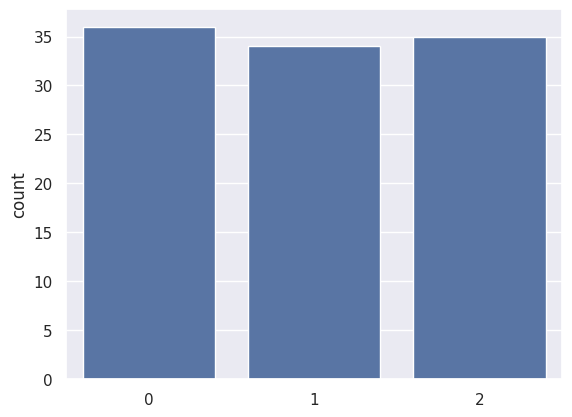

In [18]:
sns.countplot(x=y_train)
plt.show()

In [19]:
#stratify option 사용
# 지정한 벡터의 값에 대해 계층적 분할을 수행한다.
# 반드시 이산형 형태의 값만 있어야 한다.(정수)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=121,
    stratify=y # 클래스의 비율만큼 분할 수행 각각 y 비율에 맞게 사이즈를 구성해준다. 계층적분할
)

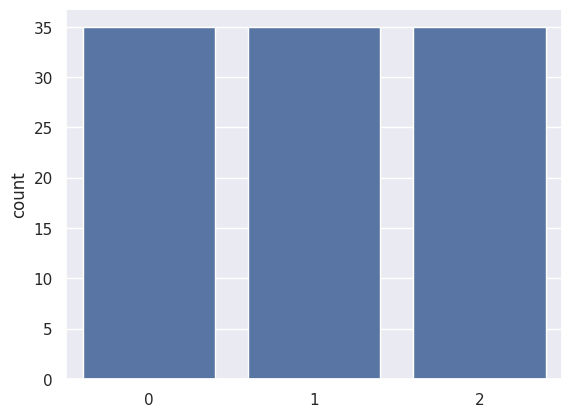

In [23]:
sns.countplot(x=y_train)
plt.show()

In [24]:
# cross_val_score

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), #classifier 들어가면 자동으로 stratified 교차검증 실행
    X,
    y,
    scoring = 'accuracy',
    cv = 3 # 폴드 갯수
)

In [26]:
import numpy as np

print("fold 별 accuracy : {}".format(scores))
print("average accuracy:{}".format(np.mean(scores)))

fold 별 accuracy : [0.98 0.94 1.  ]
average accuracy:0.9733333333333333


In [27]:
# gridsearch 이용한 하이퍼 파라미터 튜닝과 교차검증

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=121
)

In [29]:
#gridsearch 수행을 위한

In [30]:
parameters = {
    "max_depth" : [1,2,3],
    "min_samples_split" : [2,3]
}

In [32]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(), #모델 6개, 폴드 3개라 18번의 훈련이 이루어짐
    param_grid=parameters, #GridSearch를 수행하기 위한 파라미터 목록 전달
    return_train_score=True,# 훈련 세트에 대한 평가 점수도 같이 확인하게 해주는 옵션
    n_jobs=-1,# 시용가능한 CPU코어 모두 사용
    cv=3 # 각 하이퍼 파라미터 조합으로 만드는 모델에서 사용할 폴드의 개수
)

In [33]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [36]:
#GridSearchCV의 결과는 cv_results_ 변수에 들어있다.
results = grid_dt_clf.cv_results_
results

{'mean_fit_time': array([0.00380818, 0.00160209, 0.00131075, 0.00137043, 0.00127061,
        0.0011576 ]),
 'std_fit_time': array([2.93904851e-03, 7.95392713e-05, 2.92094925e-05, 1.37300538e-04,
        1.48605790e-04, 8.62483032e-05]),
 'mean_score_time': array([0.00119487, 0.00105286, 0.00101002, 0.00100454, 0.00084972,
        0.00087317]),
 'std_score_time': array([8.45101849e-05, 1.60231949e-05, 4.95579397e-05, 8.10979160e-05,
        6.14901191e-05, 6.92132416e-05]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [37]:
import pandas as pd

gs_result_df = pd.DataFrame(results)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003808,0.002939,0.001195,0.000085,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
1,0.001602,0.000080,0.001053,0.000016,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
2,0.001311,0.000029,0.001010,0.000050,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
3,0.001370,0.000137,0.001005,0.000081,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
4,0.001271,0.000149,0.000850,0.000061,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785
5,0.001158,0.000086,0.000873,0.000069,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785


In [38]:
# 최고의 성능을 냈던 하이퍼파라미터 찾기

print("best parameter :{}".format(grid_dt_clf.best_params_))

best parameter :{'max_depth': 3, 'min_samples_split': 2}


In [39]:
print("best accuracy: {}".format(grid_dt_clf.best_score_))

best accuracy: 0.9333333333333332


In [40]:
# 최고의 결과를 냈던 추정기로 예측

pred = grid_dt_clf.predict(X_test)
print("test set's accuracy : {}".format(accuracy_score(y_test,pred)))

test set's accuracy : 0.9666666666666667


In [41]:
# 최고의 결과를 냈던 추정기 가져오기

best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [42]:
pred = best_dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667